In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
%matplotlib inline

## Tabla resumen con información a nivel hogar

Esta tabla contiene las variables construidas, a partir de las 11 tablas de la base de datos, que permiten tener agrupada la información con la cual se obtienen los principales tabulados que el INEGI construye.

`HOAGRES`

In [2]:
file = '../../../../../../data/inegi-encuestas/localidad/ENIGH/hogares.csv'

In [3]:
df = pd.read_csv(file, encoding='latin')

In [4]:
df.shape

(70311, 137)

In [5]:
df_copy = df.copy()

In [6]:
df_copy.head()

,folioviv,foliohog,huespedes,huesp_come,num_trab_d,trab_come,acc_alim1,acc_alim2,acc_alim3,acc_alim4,...,est_trans,bene_licon,cond_licon,lts_licon,otros_lts,diconsa,frec_dicon,cond_dicon,pago_dicon,otro_pago
0,100003801,1,0,,0,,1,2,1,1,...,0,2,,,,2,,,,
1,100003802,1,0,,0,,2,2,2,2,...,20,2,,,,9,,,,
2,100003803,1,0,,0,,2,2,2,2,...,,2,,,,2,,,,
3,100003804,1,0,,0,,2,2,2,2,...,0,2,,,,2,,,,
4,100003805,1,0,,0,,2,2,2,2,...,0,2,,,,2,,,,


In [7]:
df_copy.columns

Index(['folioviv', 'foliohog', 'huespedes', 'huesp_come', 'num_trab_d',
       'trab_come', 'acc_alim1', 'acc_alim2', 'acc_alim3', 'acc_alim4',
       ...
       'est_trans', 'bene_licon', 'cond_licon', 'lts_licon', 'otros_lts',
       'diconsa', 'frec_dicon', 'cond_dicon', 'pago_dicon', 'otro_pago'],
      dtype='object', length=137)

### Vivienda

In [9]:
file_tvivienda_envipe2016 = '../../../../../../data/inegi-encuestas/localidad/ENIGH/viviendas.csv'

In [10]:
df_tvivienda_envipe2016 = pd.read_csv(file_tvivienda_envipe2016, encoding='latin')

/Users/jacoboleon/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [11]:
df_tvivienda_envipe2016_copy = df_tvivienda_envipe2016.copy()

In [23]:
df_tvivienda_envipe2016_copy.rename(columns={"ENT":"CVE_ENT", "MUN":"CVE_MUN"}, inplace=True)

In [12]:
df_tvivienda_envipe2016_copy.head()

,folioviv,tipo_viv,mat_pared,mat_techos,mat_pisos,antiguedad,antigua_ne,cocina,cocina_dor,cuart_dorm,...,tot_hom,tot_muj,tot_hog,ubica_geo,ageb,tam_loc,est_socio,est_dis,upm,factor
0,100003801,1,8,10,3,,1,1,2,2,...,1,1,1,10010000,000-0,1,4,3,10,247
1,100003802,2,8,10,3,,1,1,2,1,...,1,1,1,10010000,000-0,1,4,3,10,247
2,100003803,1,8,10,3,20,,1,2,4,...,2,4,1,10010000,000-0,1,4,3,10,247
3,100003804,1,8,10,3,,1,1,2,3,...,0,3,1,10010000,000-0,1,4,3,10,247
4,100003805,1,8,10,3,7,,1,2,3,...,2,0,1,10010000,000-0,1,4,3,10,247


In [16]:
df_merge_tmod_vic_envipe2016_copy = pd.merge(left=df_copy, 
                                             right=df_tvivienda_envipe2016_copy[['folioviv', 'ubica_geo']],
                                             how='inner', 
                                             on=['folioviv'])

In [17]:
df_merge_tmod_vic_envipe2016_copy.shape

(70311, 138)

In [18]:
df_merge_tmod_vic_envipe2016_copy.columns

Index(['folioviv', 'foliohog', 'huespedes', 'huesp_come', 'num_trab_d',
       'trab_come', 'acc_alim1', 'acc_alim2', 'acc_alim3', 'acc_alim4',
       ...
       'bene_licon', 'cond_licon', 'lts_licon', 'otros_lts', 'diconsa',
       'frec_dicon', 'cond_dicon', 'pago_dicon', 'otro_pago', 'ubica_geo'],
      dtype='object', length=138)

In [19]:
df_copy = df_merge_tmod_vic_envipe2016_copy.copy()

### Subset Ciudad de México

`ubica_geo`: Ubicación geográfica.

Los dos primeros dígitos representan la clave de la entidad, los siguientes tres la clave del municipio y los últimos cuatro la clave de la localidad.

In [20]:
df_copy = df_copy[(df_copy.ubica_geo > 90000000) & (df_copy.ubica_geo < 100000000)].copy()
df_copy.reset_index(inplace=True)
df_copy.drop(labels=['index'], axis=1, inplace=True)
df_copy.head()

,folioviv,foliohog,huespedes,huesp_come,num_trab_d,trab_come,acc_alim1,acc_alim2,acc_alim3,acc_alim4,...,bene_licon,cond_licon,lts_licon,otros_lts,diconsa,frec_dicon,cond_dicon,pago_dicon,otro_pago,ubica_geo
0,900168801,1,0,,0,,2,2,2,2,...,2,,,,1,3,,,,90020000
1,900168802,1,0,,0,,2,2,2,2,...,2,,,,1,3,,,,90020000
2,900168804,1,0,,0,,2,2,2,2,...,2,,,,1,2,1,2,,90020000
3,900168805,1,0,,0,,2,2,2,2,...,2,,,,9,,,,,90020000
4,900168806,1,0,,0,,2,2,2,2,...,2,,,,2,,,,,90020000


In [21]:
df_copy.ubica_geo.head()

0    90020000
1    90020000
2    90020000
3    90020000
4    90020000
Name: ubica_geo, dtype: int64

In [22]:
df_copy.ubica_geo = df_copy.ubica_geo.astype(str)

In [23]:
len(df_copy.ubica_geo[0])

8

In [24]:
for line in range(0, df_copy.shape[0]):
    if(len(df_copy.ubica_geo[line]) == 8):
        df_copy.ubica_geo[line] = '0' + df_copy.ubica_geo[line]

/Users/jacoboleon/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [25]:
df_copy.ubica_geo[0]

'090020000'

In [26]:
df_copy.ubica_geo[0][:2]

'09'

In [27]:
l_ent = []
l_mun = []
l_loc = []

In [28]:
for line in range(0, df_copy.shape[0]):
    l_ent.append(df_copy.ubica_geo[line][:2])
    l_mun.append(df_copy.ubica_geo[line][2:5])
    l_loc.append(df_copy.ubica_geo[line][5:])

In [29]:
len(l_ent) == len(l_mun) == len(l_loc)

True

In [30]:
df_copy['CVE_ENT'] = l_ent
df_copy['CVE_MUN'] = l_mun
df_copy['CVE_LOC'] = l_loc

In [31]:
df_copy.CVE_ENT.nunique()

1

In [32]:
df_09 = df_copy[df_copy.CVE_ENT == '09']

In [33]:
df_09 = df_09.copy()

In [34]:
df_09.head()

,folioviv,foliohog,huespedes,huesp_come,num_trab_d,trab_come,acc_alim1,acc_alim2,acc_alim3,acc_alim4,...,otros_lts,diconsa,frec_dicon,cond_dicon,pago_dicon,otro_pago,ubica_geo,CVE_ENT,CVE_MUN,CVE_LOC
0,900168801,1,0,,0,,2,2,2,2,...,,1,3,,,,090020000,09,002,0000
1,900168802,1,0,,0,,2,2,2,2,...,,1,3,,,,090020000,09,002,0000
2,900168804,1,0,,0,,2,2,2,2,...,,1,2,1,2,,090020000,09,002,0000
3,900168805,1,0,,0,,2,2,2,2,...,,9,,,,,090020000,09,002,0000
4,900168806,1,0,,0,,2,2,2,2,...,,2,,,,,090020000,09,002,0000


In [35]:
#list(df_09.columns)

In [36]:
df_09['CVE_LOC'].unique()

array(['0000'], dtype=object)

In [40]:
list_folios = ['folioviv', 'foliohog', 'ubica_geo', 'CVE_LOC', 'CVE_ENT']

In [41]:
df_09.drop(labels=list_folios, axis=1, inplace=True)

In [42]:
df_09.fillna(value=-1, inplace=True)

In [43]:
df_09.replace(to_replace=-1, value=np.NaN, inplace=True)

Text(0, 0.5, 'Observaciones')

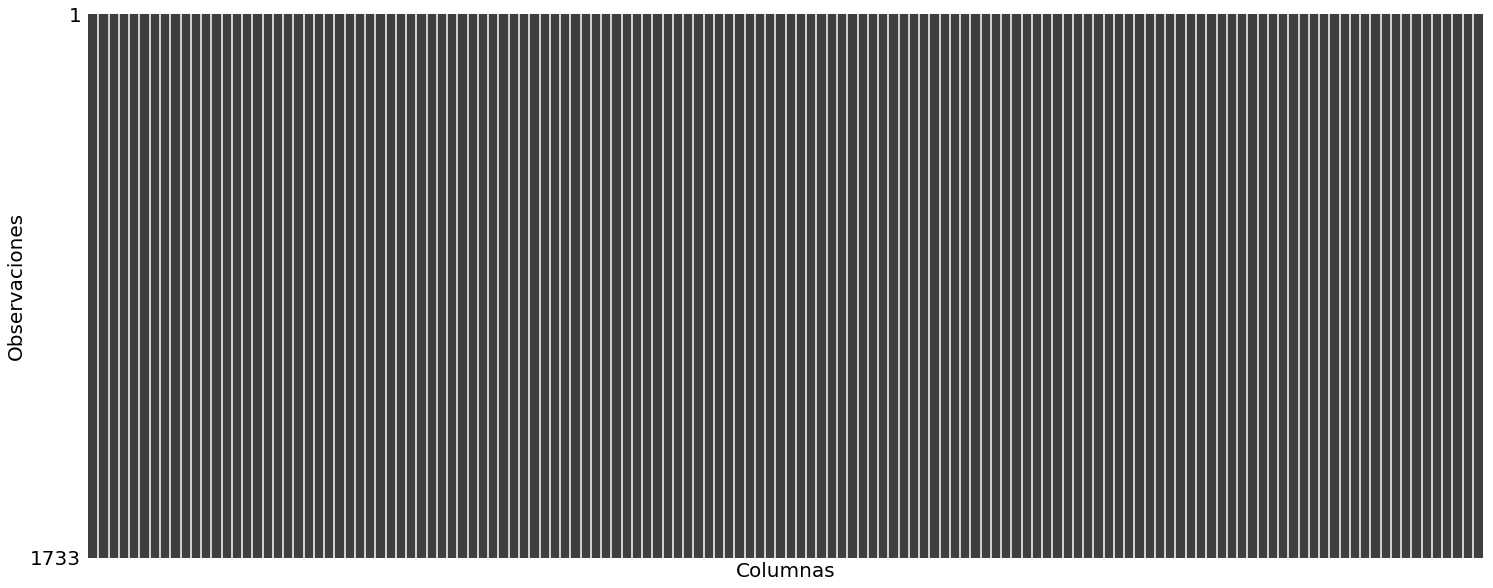

In [44]:
msno.matrix(df_09, fontsize=50, sparkline=False, labels=False)
plt.xlabel('Columnas', fontsize=20)
plt.ylabel('Observaciones', fontsize=20)
#plt.savefig('../../../images/envipe/df_tmod_vic_envipe2016_09.png', dpi=300)

Text(0, 0.5, 'Observaciones')

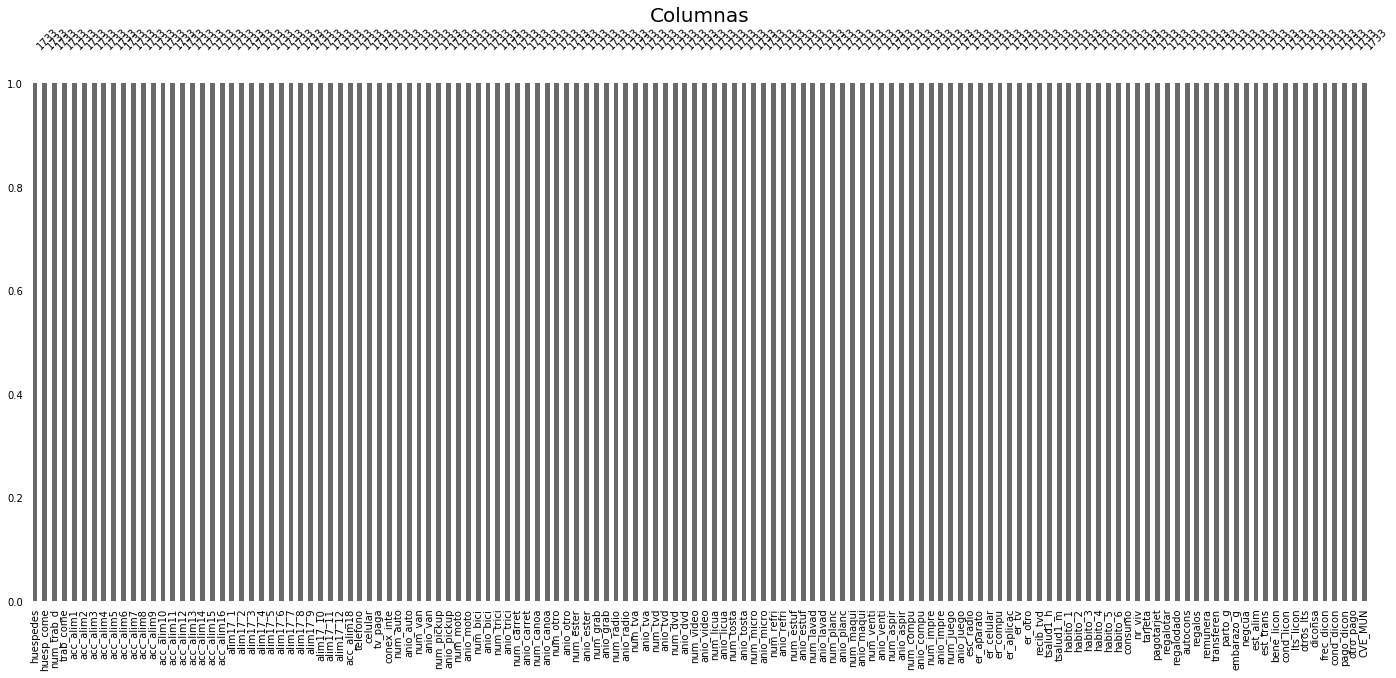

In [45]:
msno.bar(df_09, fontsize=10, labels=False)
plt.xlabel('Columnas', fontsize=20)
plt.ylabel('Observaciones', fontsize=20)
#plt.savefig('../../../images/envipe/df_tmod_vic_envipe2016_09.png', dpi=300)

In [46]:
df_09.replace(to_replace=np.NaN, value=-1, inplace=True)

In [47]:
df_09.columns[df_09.isnull().any()].tolist()

[]

In [48]:
threshold = round(df_09.shape[0]*.8)
threshold

1386

In [49]:
l = []
for column in df_09.columns:
    na_column =  df_09[column].value_counts().get(-1)
    if(na_column != None):
        if (df_09.shape[0] - na_column < threshold):
            print(column, ': ', df_09.shape[0] - na_column, ' - ', threshold)
            print(column, 'd e l e t e d')
            l.append(column)

huesp_come :  0  -  1386
huesp_come d e l e t e d
anio_carret :  0  -  1386
anio_carret d e l e t e d
anio_canoa :  0  -  1386
anio_canoa d e l e t e d
er_aparato :  950  -  1386
er_aparato d e l e t e d
habito_1 :  1337  -  1386
habito_1 d e l e t e d
habito_2 :  1314  -  1386
habito_2 d e l e t e d
habito_3 :  1188  -  1386
habito_3 d e l e t e d
habito_5 :  1050  -  1386
habito_5 d e l e t e d
consumo :  1242  -  1386
consumo d e l e t e d


In [50]:
df_09.shape

(1733, 136)

In [51]:
file = '../../../../../../dataframes/enigh/HOGARES/df_09.csv'

In [53]:
df_09.to_csv(file,index = False, header = True, sep = ',', encoding = 'utf-8')